In [1]:
import pandas as pd                                 ### importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir(r'C:\Users\guthu\Desktop\EV data')         ### change to working directory

In [2]:
data = pd.read_csv('ElectricCarData_Norm.csv')         ### load the data

In [3]:
data.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [4]:
Data_N=data.loc[:,['Brand','Accel','TopSpeed','Range','Efficiency','FastCharge','RapidCharge','PowerTrain','PlugType','BodyStyle','Segment']]
E=[]
for c in Data_N.columns:
       dic={}
       F=[]
       for j in range(len(Data_N[c].unique())):         ### Converting catgorical data into numeric data
            dic[Data_N[c].unique()[j]]=j    
       for i in range(len(Data_N[c])):
                F.append(dic[Data_N[c][i]])
       E.append(F)

In [5]:
E=np.array(E).reshape((103,11))

In [6]:
Num_data = pd.DataFrame(E,columns=Data_N.columns)

In [7]:
Num_data[['Seats','PriceEuro']]=np.array(data[['Seats','PriceEuro']])

In [8]:
Num_data        ### numeric data

,Brand,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0,1,2,3,4,5,1,6,0,7,8,5,55480
1,9,10,3,10,1,11,1,12,13,14,0,5,30000
2,15,7,0,1,1,16,3,6,7,17,18,5,56440
3,0,19,9,20,21,18,8,0,10,7,15,5,68040
4,22,17,14,11,23,24,7,0,14,15,0,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,3,1,5,7,2,1,3,2,2,4,1,5,45000
99,3,2,0,1,5,0,3,6,6,6,0,5,96050
100,2,1,3,5,1,1,0,4,0,3,1,5,50000
101,3,4,0,6,2,6,5,1,1,5,4,5,65000


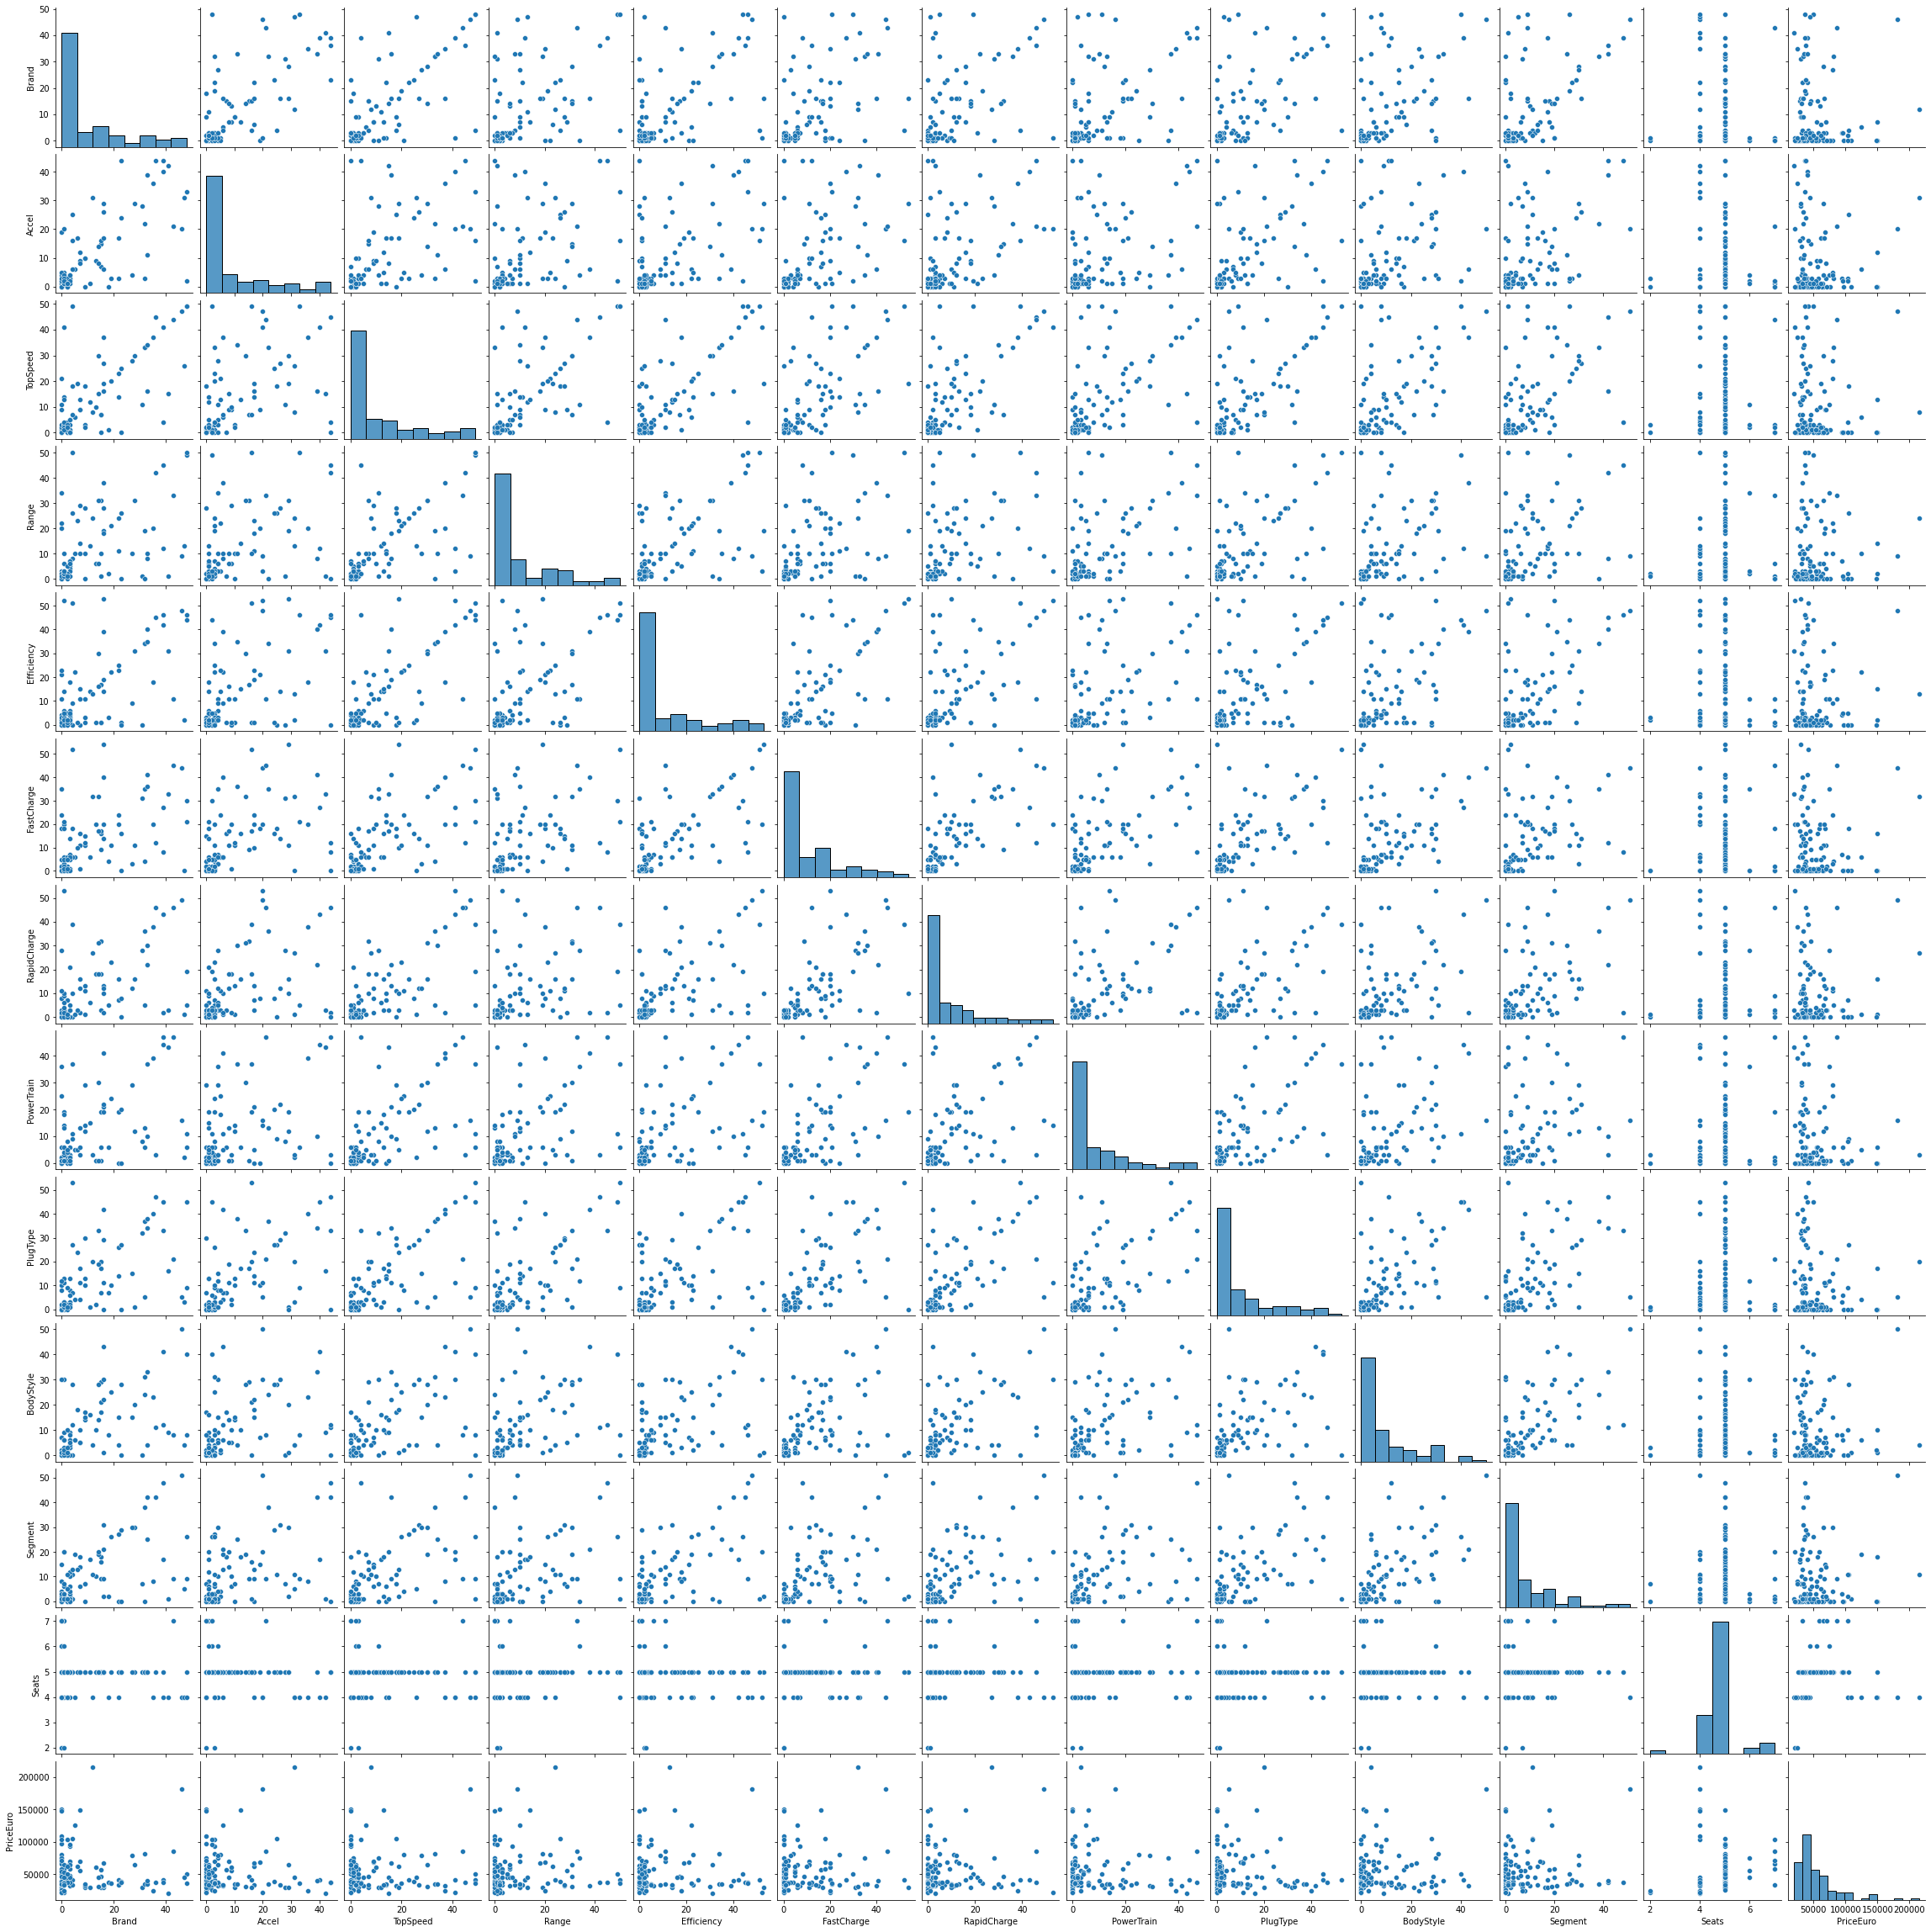

In [10]:
sns.pairplot(Num_data)     ### scatter plot against every variable

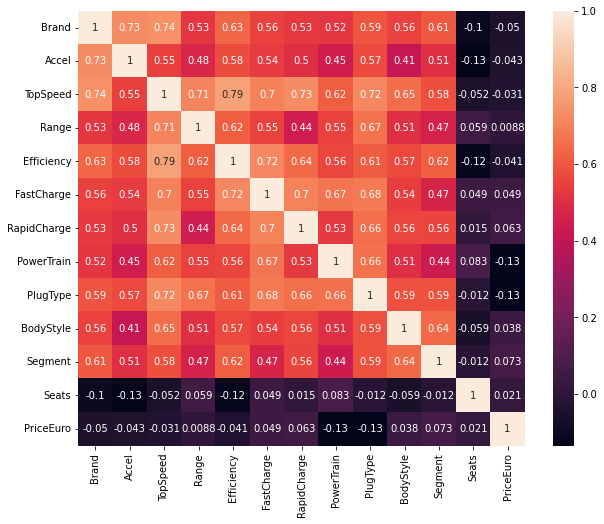

In [11]:
plt.figure(figsize=(10,8))           ### check for correlation
sns.heatmap(Num_data.corr(),annot=True)
plt.show()

### Descriptive Analysis

Text(0.5, 0, 'Range')

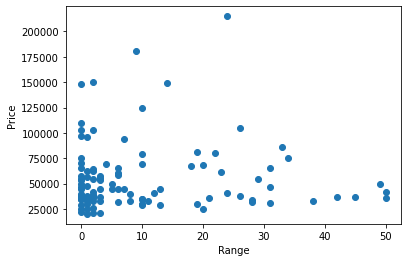

In [9]:
plt.scatter(Num_data['Range'],Num_data['PriceEuro'])
plt.ylabel('Price')
plt.xlabel('Range')

In [26]:
# Standardizing the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
P = sc.fit_transform(np.array(Num_data))
#S = sc.fit_transform(np.array(data['Seats']).reshape(-1,1))

In [28]:
P = pd.DataFrame(P,columns=Num_data.columns)
P

,Brand,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,0.000000,0.022727,0.040816,0.06,0.075472,0.092593,0.018868,0.127660,0.000000,0.14,0.156863,0.6,0.181407
1,0.187500,0.227273,0.061224,0.20,0.018868,0.203704,0.018868,0.255319,0.245283,0.28,0.000000,0.6,0.050654
2,0.312500,0.159091,0.000000,0.02,0.018868,0.296296,0.056604,0.127660,0.132075,0.34,0.352941,0.6,0.186334
3,0.000000,0.431818,0.183673,0.40,0.396226,0.333333,0.150943,0.000000,0.188679,0.14,0.294118,0.6,0.245860
4,0.458333,0.386364,0.285714,0.22,0.433962,0.444444,0.132075,0.000000,0.264151,0.30,0.000000,0.4,0.066033
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.062500,0.022727,0.102041,0.14,0.037736,0.018519,0.056604,0.042553,0.037736,0.08,0.019608,0.6,0.127628
99,0.062500,0.045455,0.000000,0.02,0.094340,0.000000,0.056604,0.127660,0.113208,0.12,0.000000,0.6,0.389596
100,0.041667,0.022727,0.061224,0.10,0.018868,0.018519,0.000000,0.085106,0.000000,0.06,0.019608,0.6,0.153286
101,0.062500,0.090909,0.000000,0.12,0.037736,0.111111,0.094340,0.021277,0.018868,0.10,0.078431,0.6,0.230260


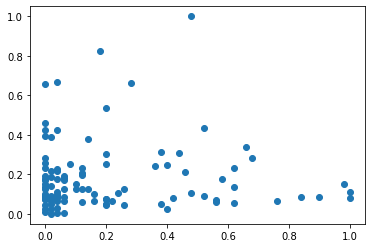

In [29]:
plt.scatter(P['Range'],P['PriceEuro'])

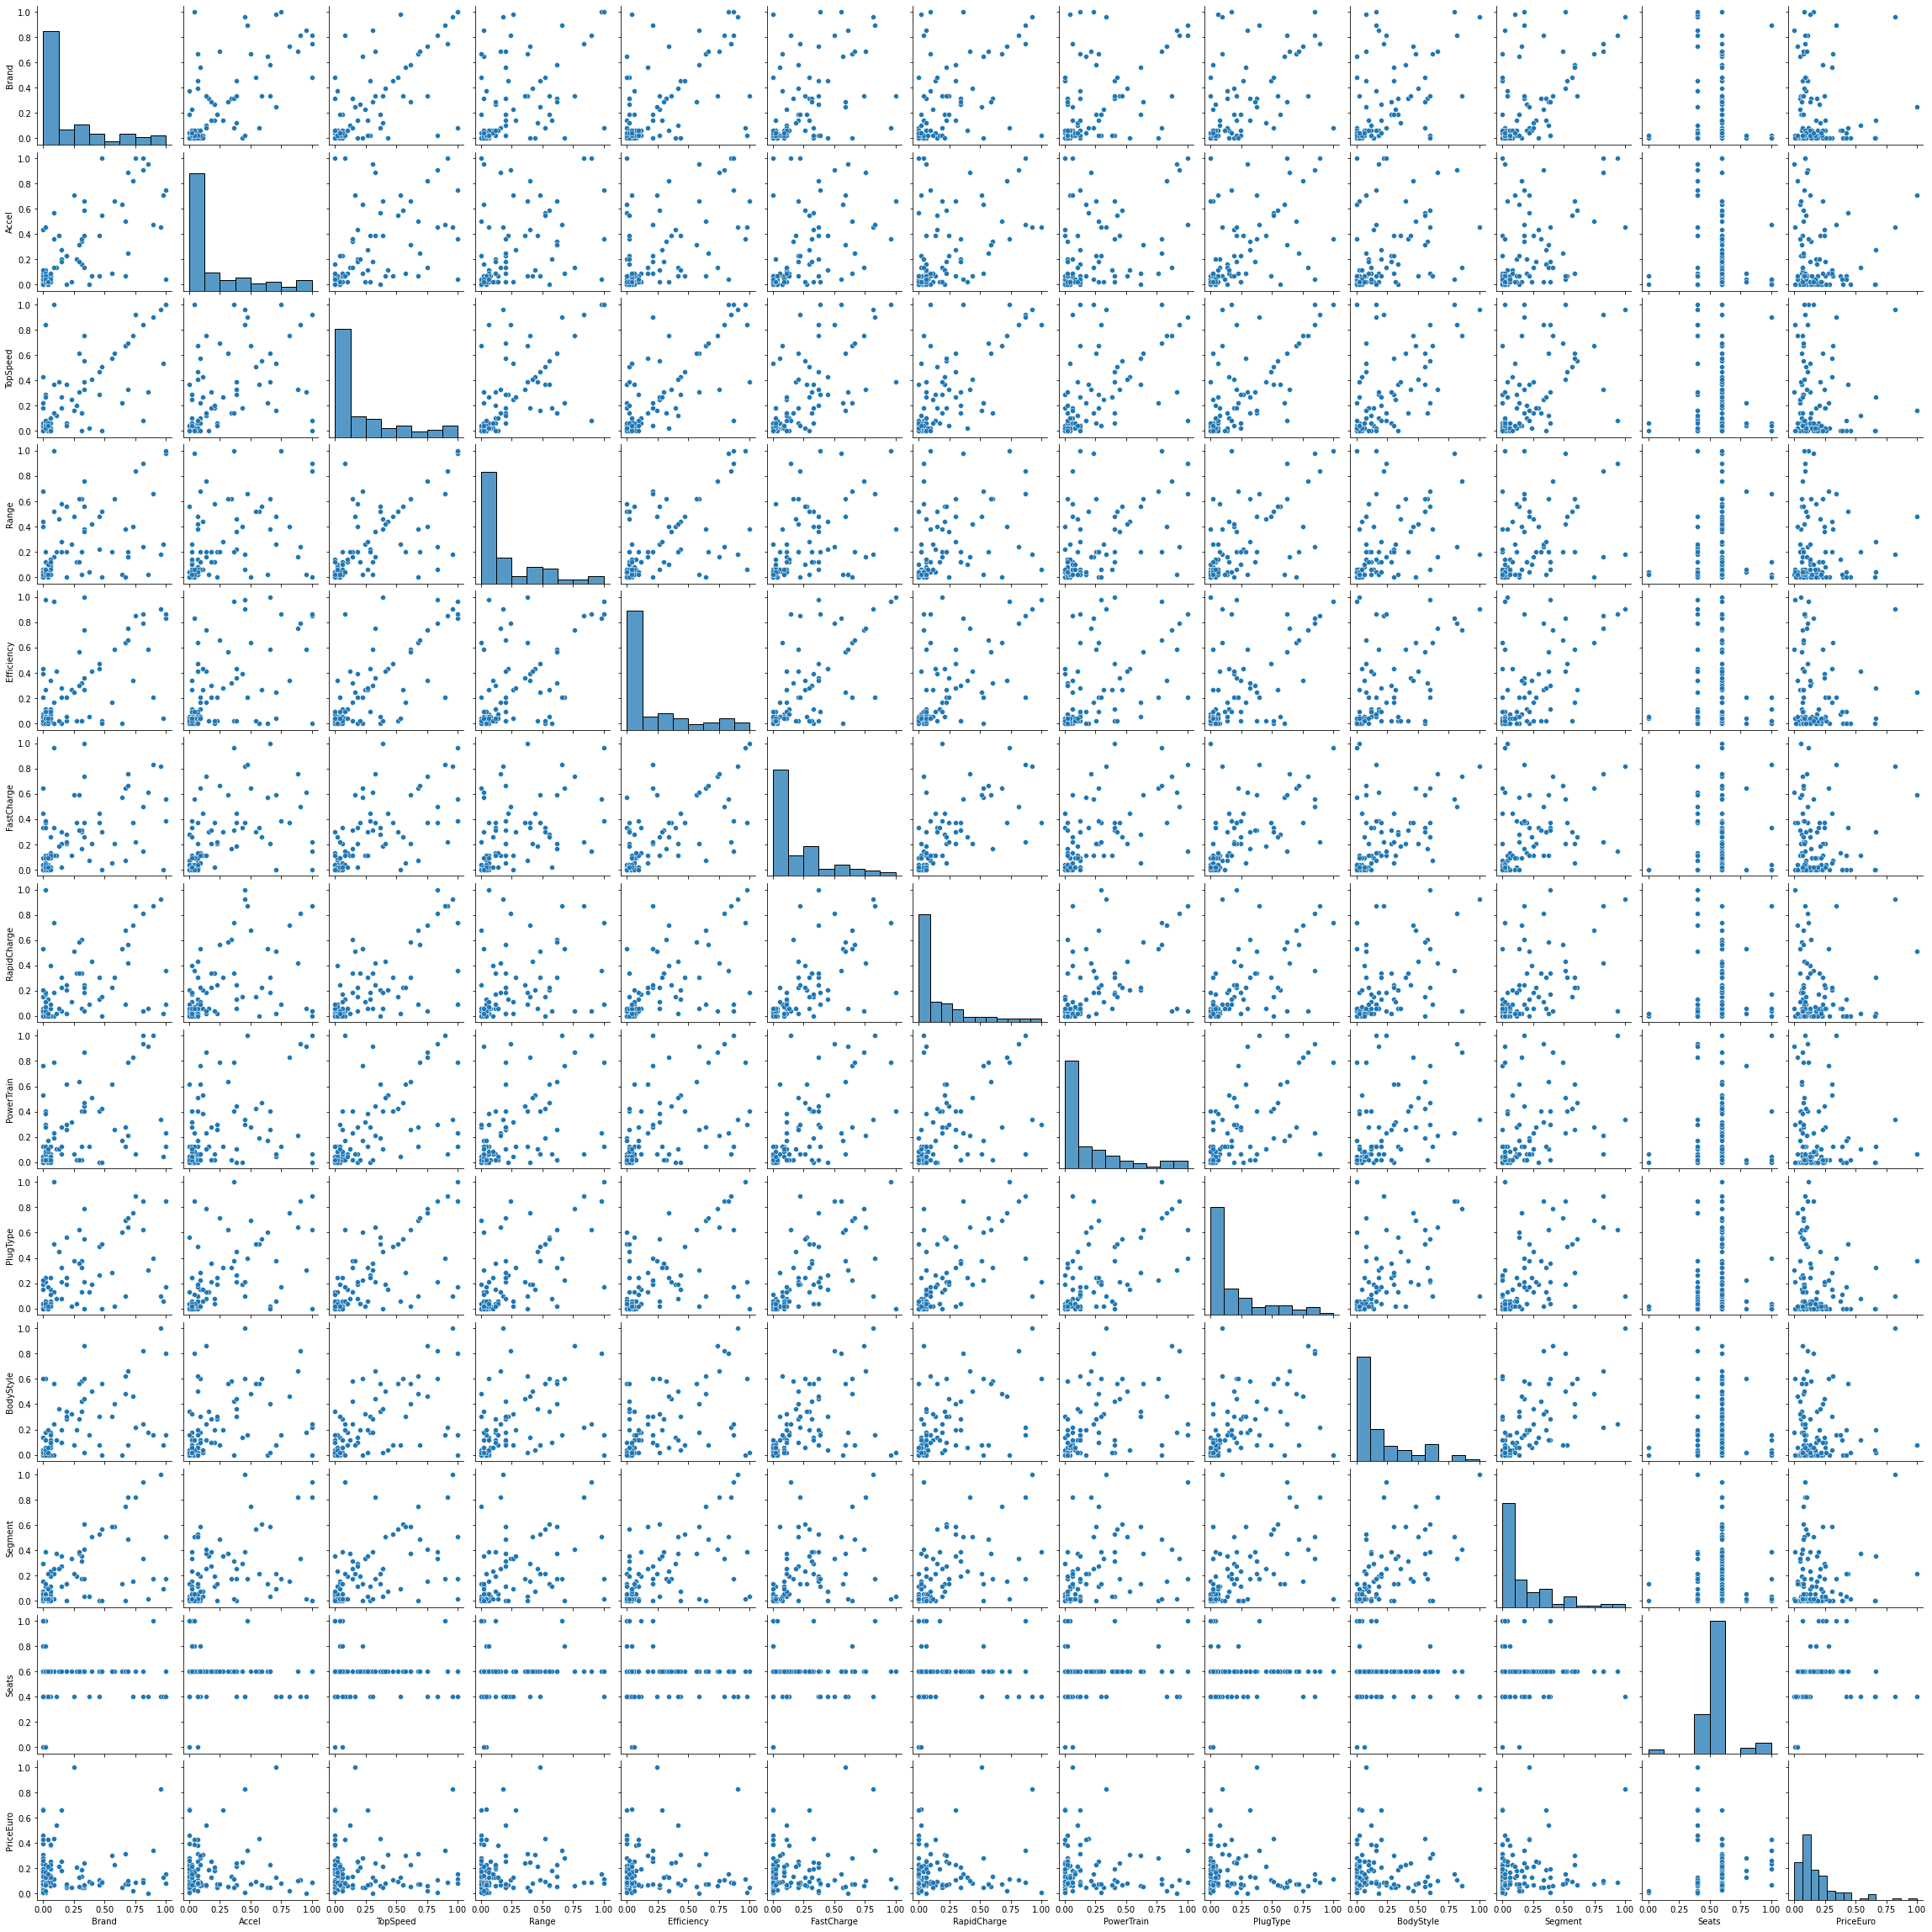

In [30]:
#x = sc.fit_transform(Num_data)
#X = pd.DataFrame(x,columns=Num_data.columns)
sns.pairplot(P)

Text(0.5, 0, 'Number of seats')

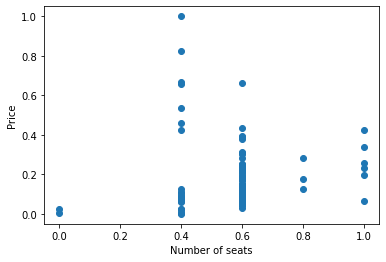

In [12]:
plt.scatter(S,P)
plt.ylabel('Price')
plt.xlabel('Number of seats')

In [15]:
data.isnull().sum()      ### check the missing values

Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     0
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
dtype: int64

### Types of Car Brands

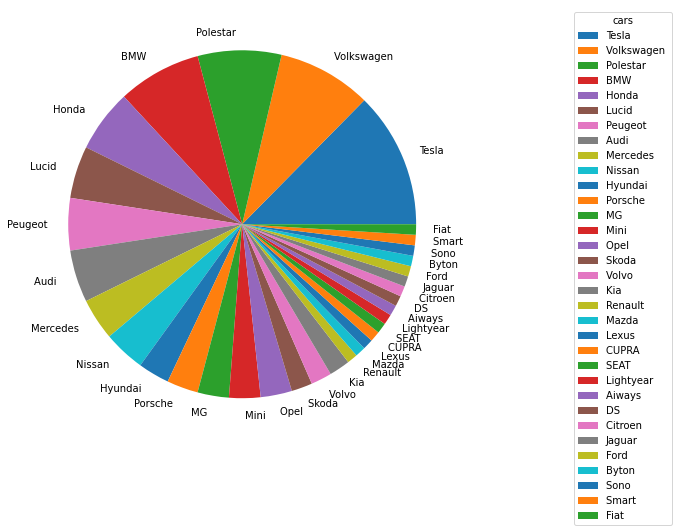

In [16]:
Brands = data['Brand'].unique()
L=data['Brand'].value_counts()
plt.figure(figsize=(15,8))
plt.pie(L,labels=Brands)                                        ### Pie chart
plt.legend(Brands,title='cars',bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

In [17]:
Brands

array(['Tesla ', 'Volkswagen ', 'Polestar ', 'BMW ', 'Honda ', 'Lucid ',
       'Peugeot ', 'Audi ', 'Mercedes ', 'Nissan ', 'Hyundai ',
       'Porsche ', 'MG ', 'Mini ', 'Opel ', 'Skoda ', 'Volvo ', 'Kia ',
       'Renault ', 'Mazda ', 'Lexus ', 'CUPRA ', 'SEAT ', 'Lightyear ',
       'Aiways ', 'DS ', 'Citroen ', 'Jaguar ', 'Ford ', 'Byton ',
       'Sono ', 'Smart ', 'Fiat '], dtype=object)

### Cars with rapid charge

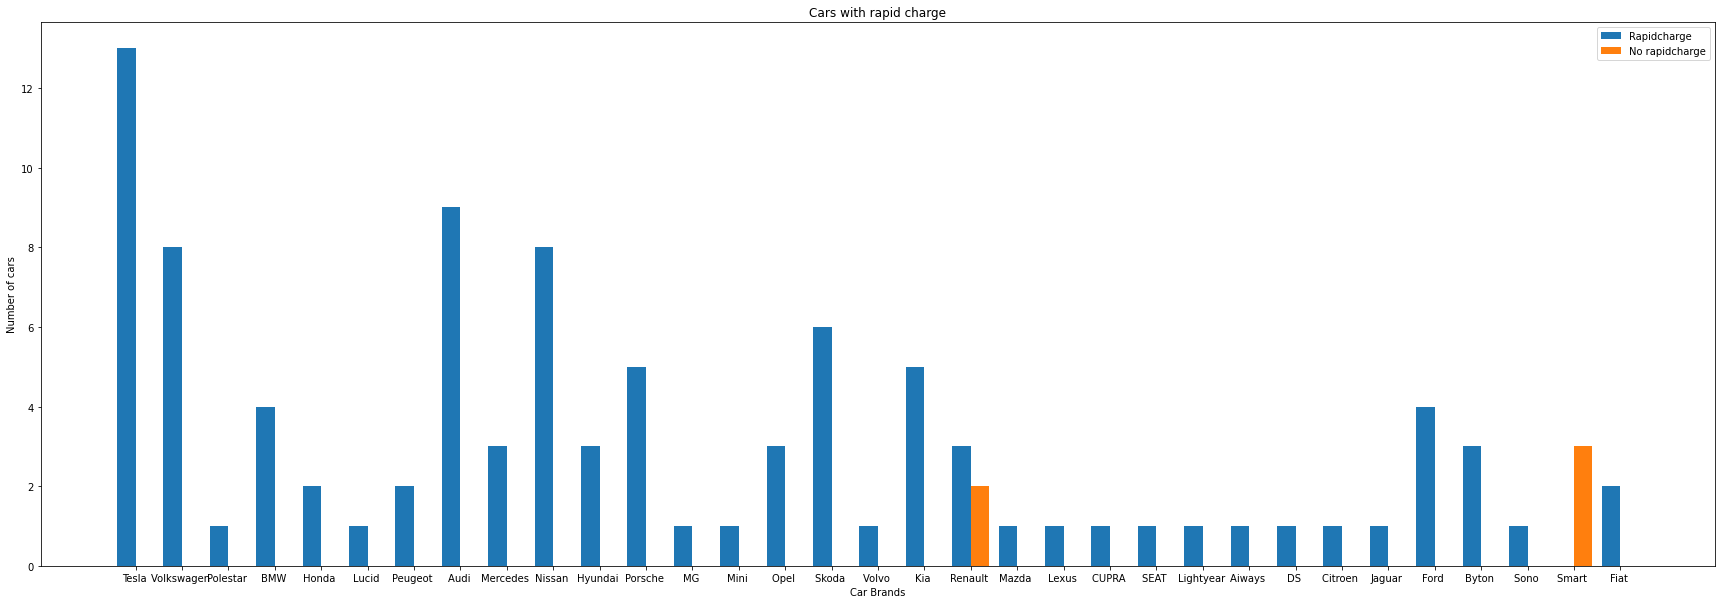

In [18]:
Data_brand = Brands[:]          ### Barplots
rp=[]
No_rp=[]
for brand in Data_brand:
    D = data[data['Brand']==brand]
    l=len(D['RapidCharge'][D['RapidCharge']=='Rapid charging possible'])
    n = len(D['RapidCharge'][D['RapidCharge']=='Rapid charging not possible'])
    rp.append(l)
    No_rp.append(n)
    
X_axis = np.arange(len(Data_brand))
plt.figure(figsize=(30,10))
plt.bar(X_axis - 0.2, rp, 0.4, label = 'Rapidcharge')
plt.bar(X_axis + 0.2, No_rp, 0.4, label = 'No rapidcharge')
plt.xticks(X_axis, Data_brand)
plt.xlabel("Car Brands")
plt.ylabel("Number of cars")
plt.title("Cars with rapid charge")
plt.legend()
plt.show()

### price segments

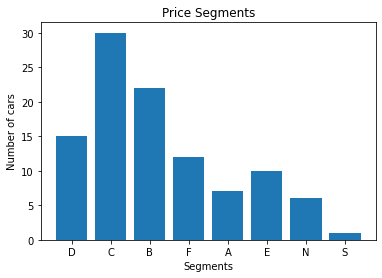

In [25]:
Segments=[]
for segment in data['Segment'].unique():
    Segments.append(len(data[data['Segment']==segment]))
plt.bar(data['Segment'].unique(),Segments)
plt.title('Price Segments')
plt.xlabel('Segments')
plt.ylabel('Number of cars')
plt.show()

### Price range for respective segments 

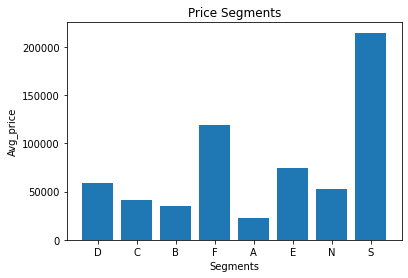

In [20]:
Avg_price=[]
for segment in data['Segment'].unique():
    Avg_price.append(data[data['Segment']==segment]['PriceEuro'].mean())
plt.bar(data['Segment'].unique(),Avg_price)
plt.title('Price Segments')
plt.xlabel('Segments')
plt.ylabel('Avg_price')
plt.show()

### Price Segments with respect to each brand

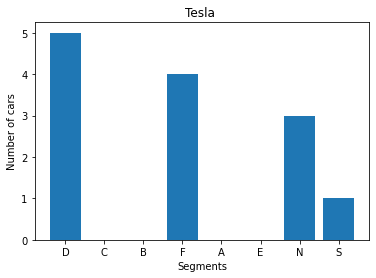

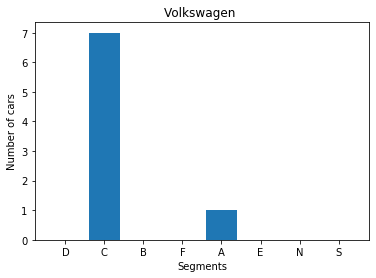

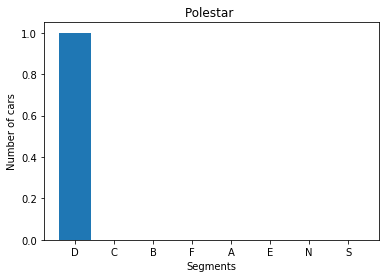

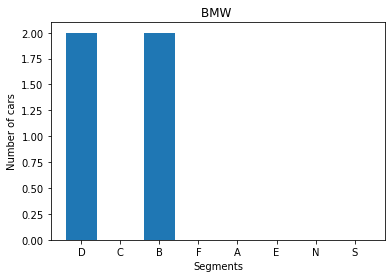

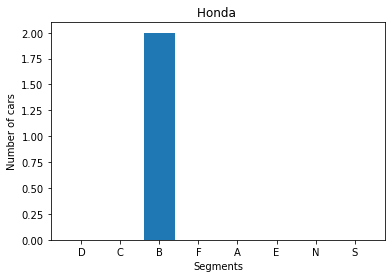

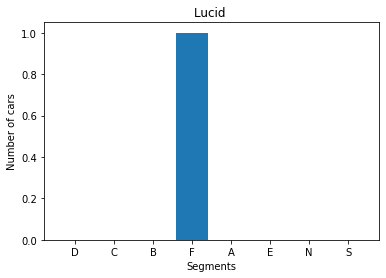

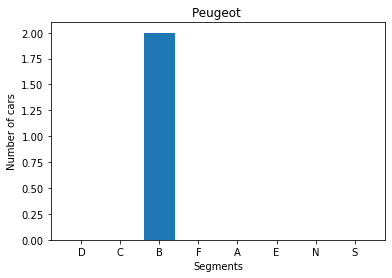

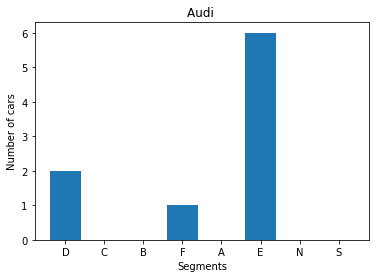

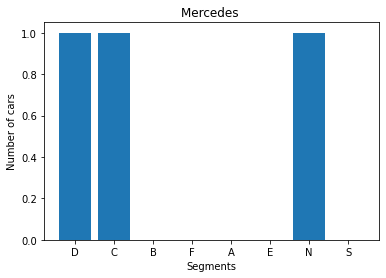

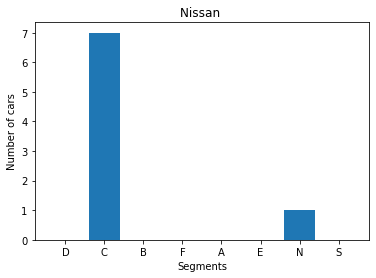

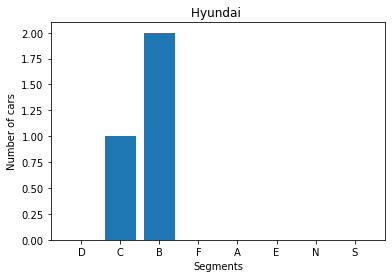

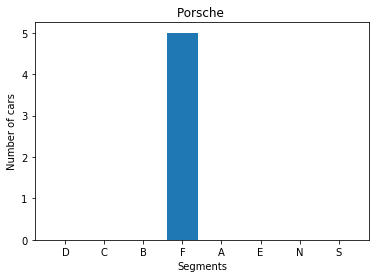

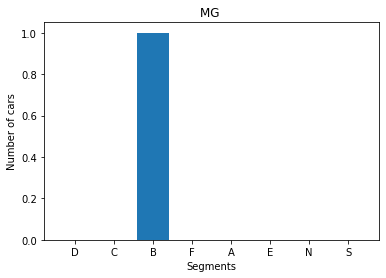

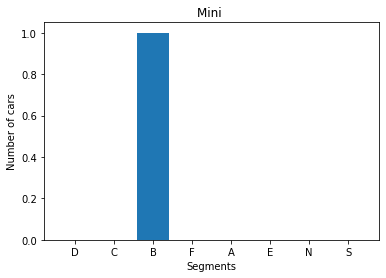

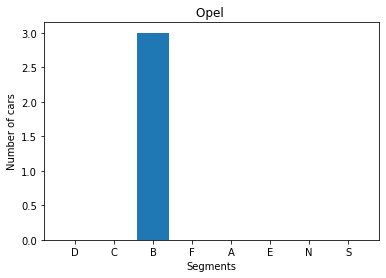

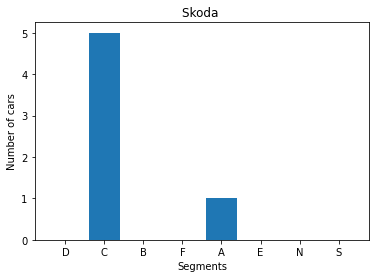

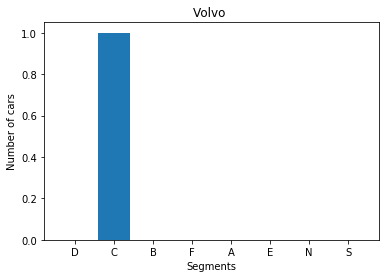

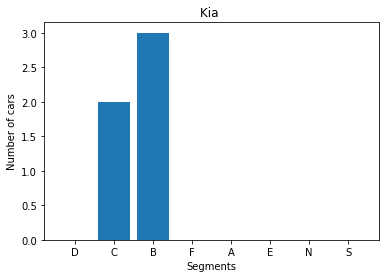

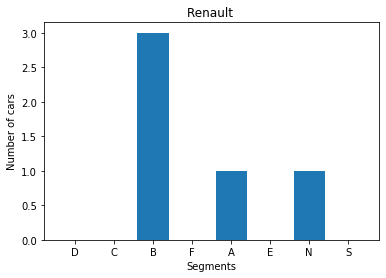

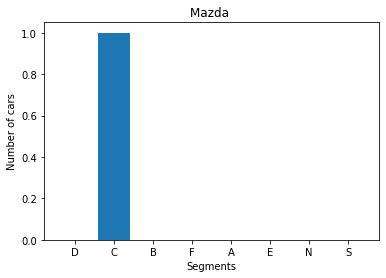

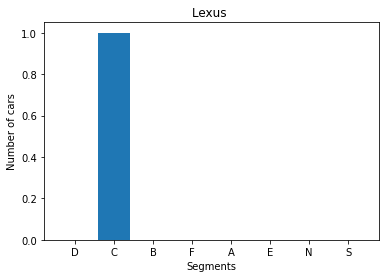

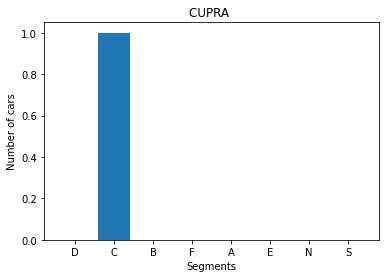

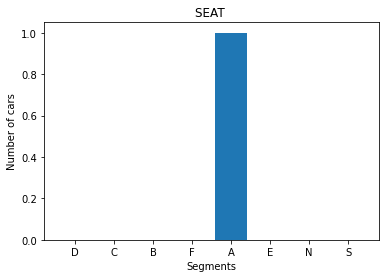

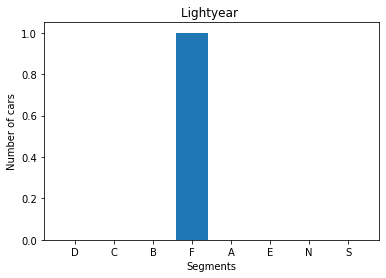

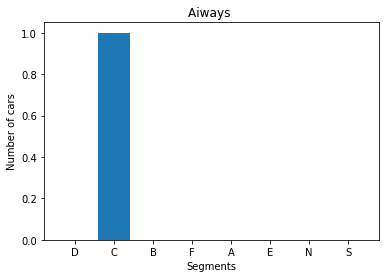

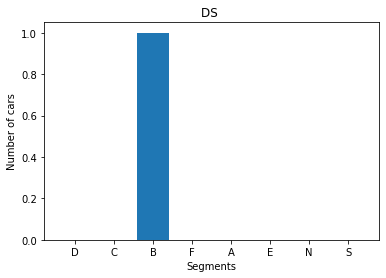

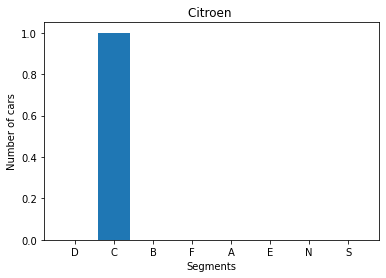

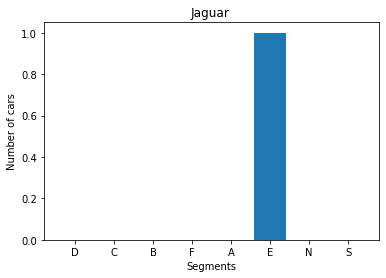

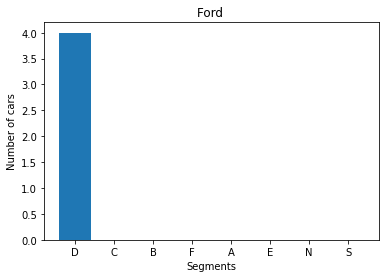

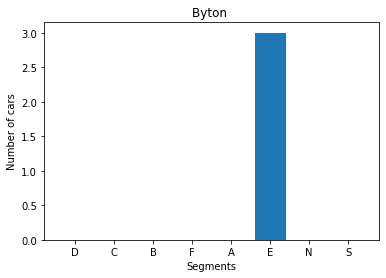

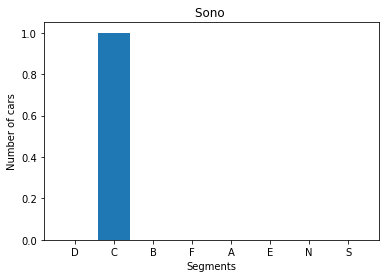

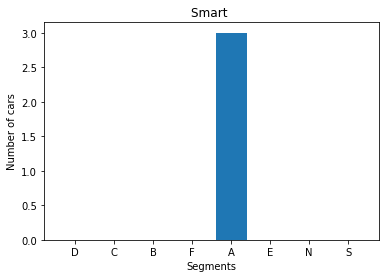

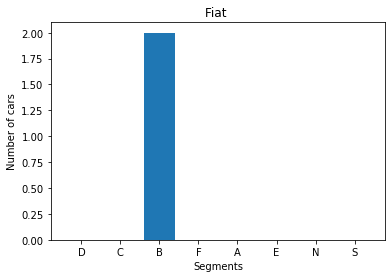

In [21]:
for brand in Data_brand:
    Segments=[]
    for segment in data['Segment'].unique():
        D=data[data['Brand']==brand]
        l = len(D['Segment'][D['Segment']==segment])
        Segments.append(l)
    plt.bar(data['Segment'].unique(),Segments)
    plt.title(brand)
    plt.xlabel('Segments')
    plt.ylabel('Number of cars')
    plt.show()

### Capacity with respect to price segments

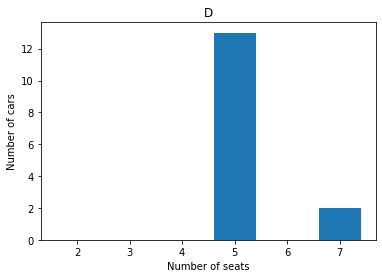

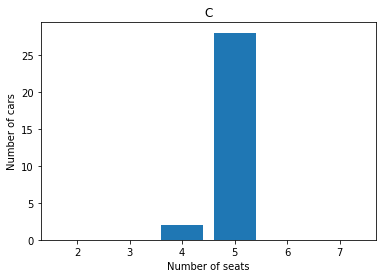

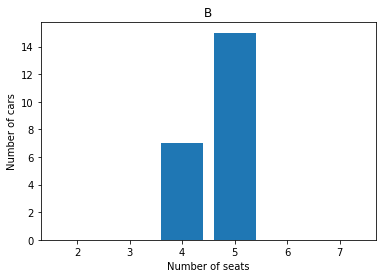

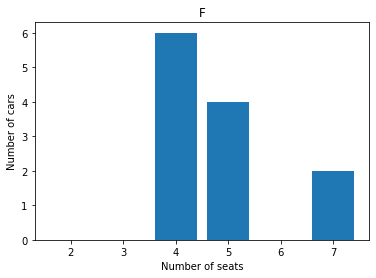

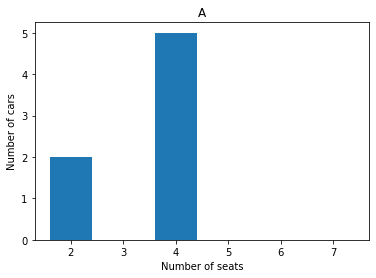

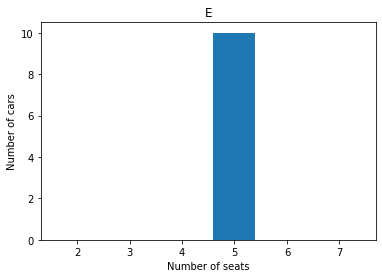

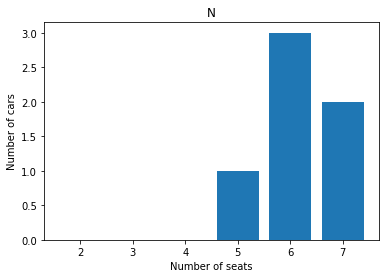

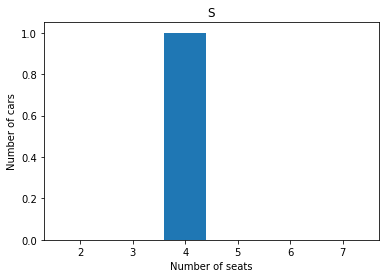

In [22]:
for segment in data['Segment'].unique():
    D=data[data['Segment']==segment]
    Capacity=[]
    for seats in data['Seats'].unique():
       Capacity.append(len(D['Seats'][D['Seats']==seats]))
    plt.bar(data['Seats'].unique(),Capacity)
    plt.title(segment)
    plt.xlabel('Number of seats')
    plt.ylabel('Number of cars')
    plt.show()

### Body type with respect to number of seats and segments

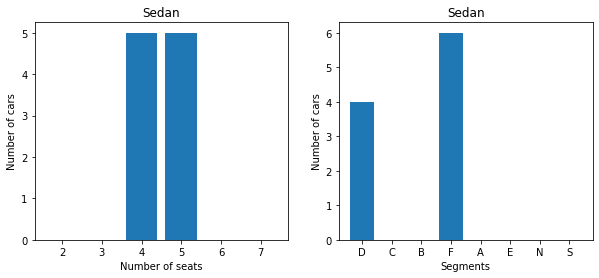

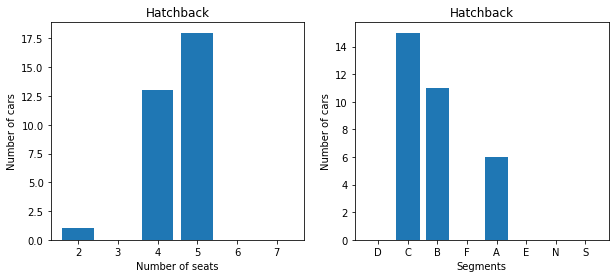

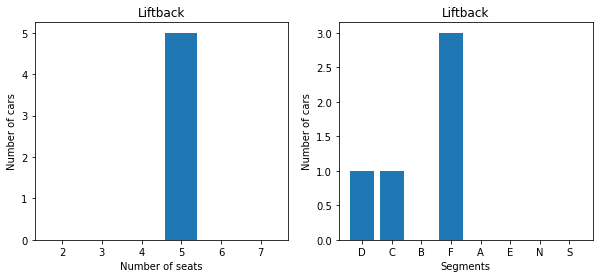

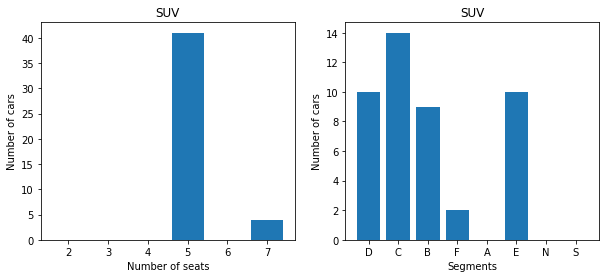

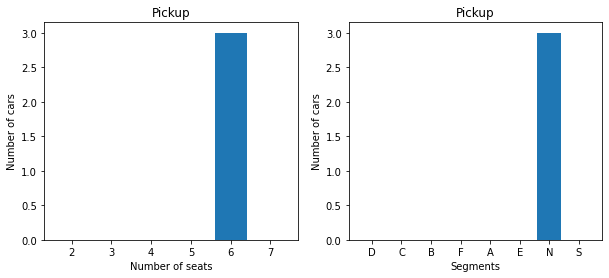

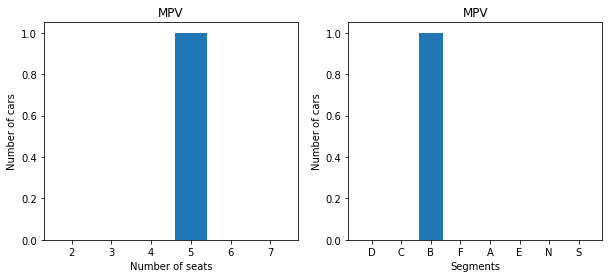

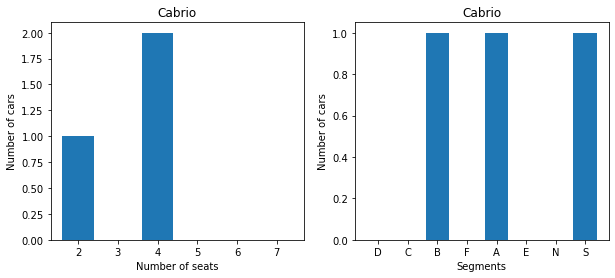

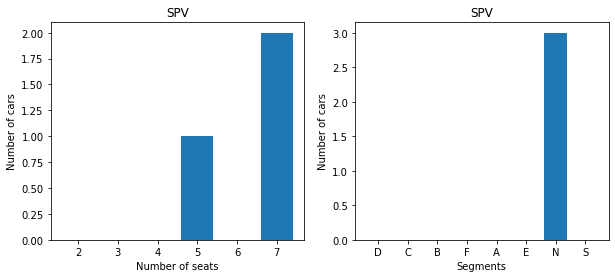

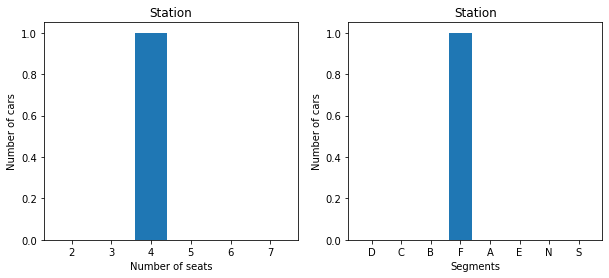

In [23]:
for car_type in data['BodyStyle'].unique():
    D=data[data['BodyStyle']==car_type]
    Seats=[]
    Car_type=[]
    for seats in data['Seats'].unique():
       Seats.append(len(D['Seats'][D['Seats']==seats]))
    for segment in data['Segment'].unique():
       Car_type.append(len(D['Segment'][D['Segment']==segment]))
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.bar(data['Seats'].unique(),Seats)
    plt.title(car_type)
    plt.xlabel('Number of seats')
    plt.ylabel('Number of cars')
    plt.subplot(1,2,2)
    plt.bar(data['Segment'].unique(),Car_type)
    plt.title(car_type)
    plt.xlabel('Segments')
    plt.ylabel('Number of cars')    
    plt.show()

### PCA 

In [24]:
from sklearn.decomposition import PCA   ### import PCA to perform pricipal component analysis
pca = PCA()
df = pca.fit_transform(Num_data)
explained_variance = pca.explained_variance_ratio_    ### get the variance associated with each and every pca variable

In [25]:
explained_variance         ### Variance of the varibles after PCA transformation

array([9.99998375e-01, 1.04498170e-06, 1.09092955e-07, 8.71937127e-08,
       8.20454195e-08, 7.55171571e-08, 5.69148541e-08, 5.34200762e-08,
       3.96220235e-08, 3.28184384e-08, 2.64223418e-08, 1.62321826e-08,
       4.71734316e-10])

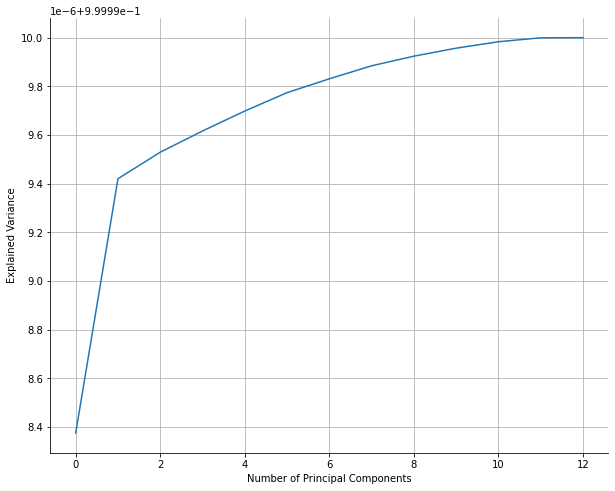

In [26]:
plt.figure(figsize=(10,8))                ### plot to see the variations of the transformed variables
plt.plot(np.cumsum(explained_variance))
plt.grid()
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
sns.despine()

In [27]:
df = pd.DataFrame(df)   ## Transformed variables after performing PCA
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-331.562242,-22.800547,2.199646,1.935217,-4.383845,0.181457,-5.338933,2.419905,-0.259737,0.829601,-1.803596,-1.813203,-0.008151
1,-25811.563339,-9.721566,2.136437,-6.751608,1.575793,-9.650101,-2.714542,-1.511293,-9.500303,-1.298351,1.456690,2.369584,-0.096909
2,628.437722,-7.668157,-7.264952,6.489702,-5.947758,-11.475097,-8.114280,2.499586,-6.780780,-8.135158,-7.717425,1.162769,0.079919
3,12228.437473,5.344161,-0.196753,-2.723289,1.200166,10.520975,6.114541,17.110914,-7.162787,2.007288,-3.631845,-3.835289,-0.130989
4,-22814.563316,12.125114,-6.527159,1.766753,8.382943,9.718081,1.103145,-2.495232,-15.399912,-9.826798,2.597362,4.573782,0.410858
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,-10811.562396,-24.198372,1.104403,-2.331563,-2.344265,2.563930,2.330170,-3.475385,0.092249,1.158763,-0.411408,0.602209,-0.081015
99,40238.436961,-22.665674,1.582468,-0.718978,0.548203,-2.646304,-2.335849,-0.556630,1.568883,0.378248,8.928347,4.282081,-0.341018
100,-5811.562442,-27.290363,1.042336,-2.831657,-1.000910,1.421834,-1.300465,-2.391999,0.561542,1.162614,-0.295870,-0.370062,-0.062937
101,9188.437871,-22.431610,-0.036748,0.678209,-0.018603,0.105720,1.254391,1.016769,-2.648857,0.869744,-3.371148,2.244647,0.003991


In [28]:
from numpy.linalg import norm                ### cosine similarity to check if there is any relation between variables
def cosine_similarity(A,B):
    x = norm(A, axis=1).reshape(-1,1)
    cosine = np.dot(A,B)/(x*norm(B))
    return cosine

In [29]:
Data = Num_data.astype('float64')

In [30]:
similarity_matrix = cosine_similarity(Data,np.transpose(Data))

In [31]:
similarity_matrix

array([[0.08366911, 0.04524285, 0.08511688, ..., 0.07540474, 0.09802617,
        0.09350188],
       [0.08366907, 0.04524287, 0.08511687, ..., 0.07540471, 0.09802613,
        0.09350184],
       [0.0836691 , 0.04524286, 0.08511689, ..., 0.07540473, 0.09802616,
        0.09350187],
       ...,
       [0.0836691 , 0.04524285, 0.08511688, ..., 0.07540474, 0.09802617,
        0.09350188],
       [0.0836691 , 0.04524285, 0.08511688, ..., 0.07540474, 0.09802617,
        0.09350188],
       [0.0836691 , 0.04524285, 0.08511688, ..., 0.07540474, 0.09802617,
        0.09350188]])

In [32]:
def euclidian_distance(A):         ### euclidean distance to check if there is any relation between variables
    L1=[]
    A = np.array(A)
    for i in range(len(A)):
        L=[]
        for j in range(len(A)):
            x=A[i,:]-A[j,:]
            x = np.dot(np.transpose(x),x)
            L.append(x)
        L1.append(L)
    return np.array(L1)

In [33]:
Dis = euclidian_distance(Data)

In [34]:
Dis      ### euclidean matrix

array([[0.00000000e+00, 6.49230975e+08, 9.22252000e+05, ...,
        3.00305040e+07, 9.06304980e+07, 4.25104590e+07],
       [6.49230975e+08, 0.00000000e+00, 6.99074169e+08, ...,
        4.00000611e+08, 1.22500050e+09, 1.02400064e+09],
       [9.22252000e+05, 6.99074169e+08, 0.00000000e+00, ...,
        4.14746020e+07, 7.32742840e+07, 3.09143970e+07],
       ...,
       [3.00305040e+07, 4.00000611e+08, 4.14746020e+07, ...,
        0.00000000e+00, 2.25000094e+08, 1.44000057e+08],
       [9.06304980e+07, 1.22500050e+09, 7.32742840e+07, ...,
        2.25000094e+08, 0.00000000e+00, 9.00008900e+06],
       [4.25104590e+07, 1.02400064e+09, 3.09143970e+07, ...,
        1.44000057e+08, 9.00008900e+06, 0.00000000e+00]])

<AxesSubplot:>

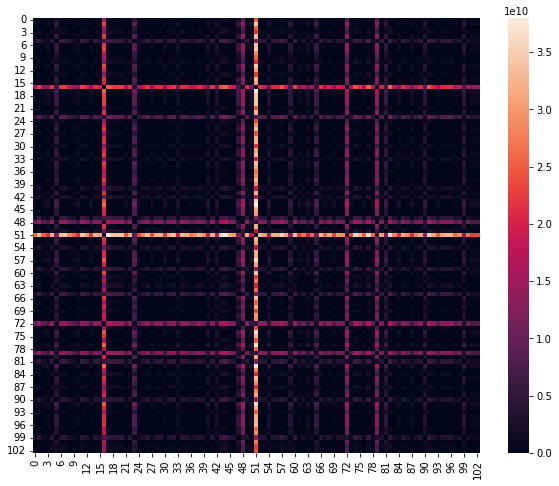

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(Dis,annot=False)

### Geographic Aspects 

In [98]:
EV_count_data = pd.read_csv('EV8_count.csv')
EV_count_data.head()

,States/Uts,Total vehicle count,2 wheeler,3 wheeler,4 wheeler,Goods vehicles,others,Grand total
0,Andaman & Nicobar Islands,145161,1,30,81,-,47,159
1,Arunachal Pradesh,242266,14,-,5,-,1,20
2,Assam,4578235,916,50765,164,7,17,51869
3,Bihar,10067557,6076,62929,127,11,34,69177
4,Chandigarh,731562,338,1482,196,-,41,2057


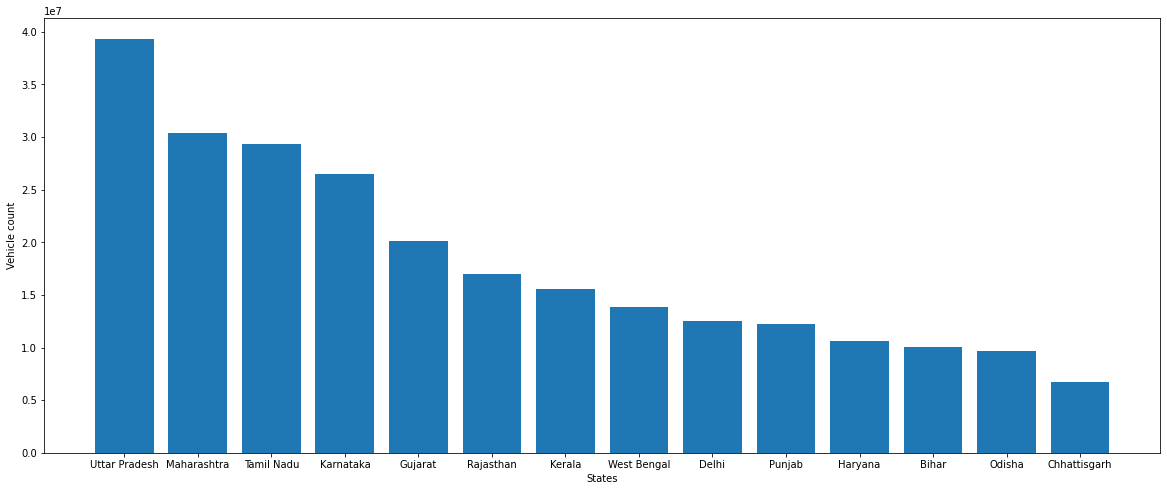

In [99]:
plt.figure(figsize=(20,8))
DF = EV_count_data[['States/Uts','Total vehicle count']].sort_values('Total vehicle count', ascending=False)
plt.bar(DF['States/Uts'][1:15],DF['Total vehicle count'][1:15])
plt.xlabel('States')
plt.ylabel('Vehicle count')
plt.show()

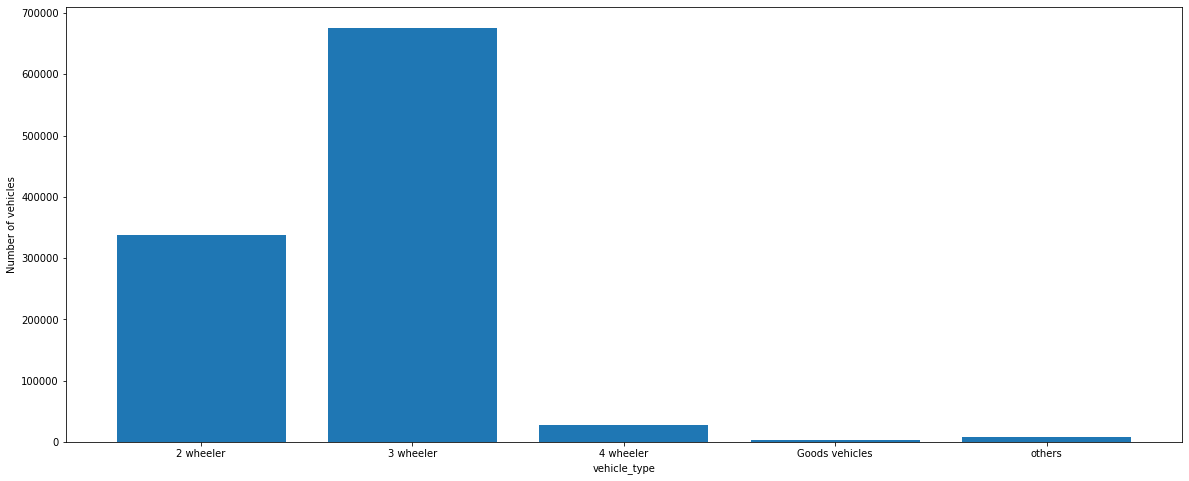

In [100]:
Type_wheeler = EV_count_data.iloc[:-1,2:7]
Type_wheeler = Type_wheeler.replace('-',0).astype('int64')
Sum_type = Type_wheeler.sum(axis=0,skipna=True)
plt.figure(figsize=(20,8))
plt.bar(Type_wheeler.columns,Sum_type)
plt.xlabel('vehicle_type')
plt.ylabel('Number of vehicles')
plt.show()

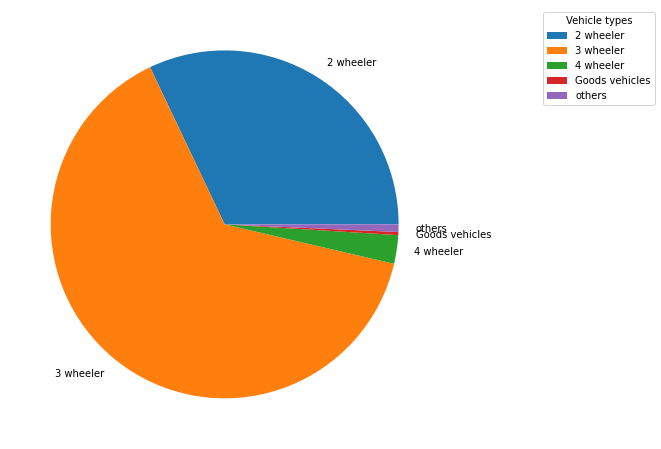

In [102]:
L=Sum_type
plt.figure(figsize=(10,8))
plt.pie(L,labels=Type_wheeler.columns)
plt.legend(Type_wheeler.columns,title='Vehicle types',bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

In [36]:
Geographic_data = pd.read_csv('electric_vehicle_charging_station_list.csv')

In [37]:
Geographic_data.head()

,no,region,address,aux addres,latitude,longitude,type,power,service
0,1,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
1,2,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
2,3,NDMC,"Outside RWA Park, Jor Bagh Market, Jor Bagh Co...","Electric Vehicle Charger, Outside RWA Park, Jo...",28.588303,77.217697,DC-001,15 kW,Self Service
3,4,NDMC,"Opposite Dory Pharmacy, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Dory Pharma...",28.582654,77.220087,DC-001,15 kW,Self Service
4,5,NDMC,"Opposite Goel Opticals, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Goel Optica...",28.584485,77.220316,DC-001,15 kW,Self Service


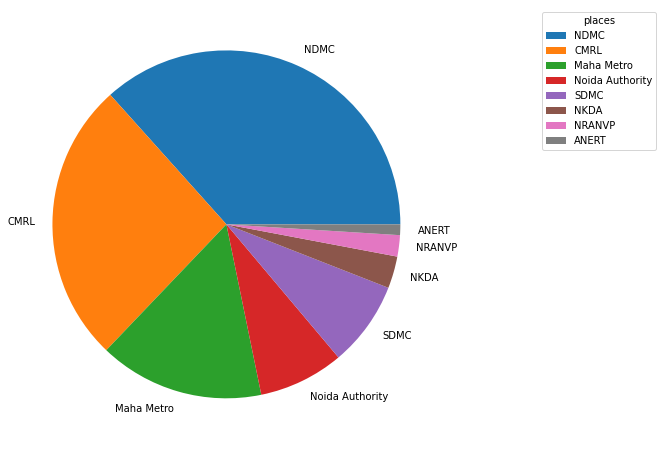

In [38]:
Places = Geographic_data['region'].unique()
L=Geographic_data['region'].value_counts()
plt.figure(figsize=(15,8))
plt.pie(L,labels=Places)
plt.legend(Places,title='places',bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

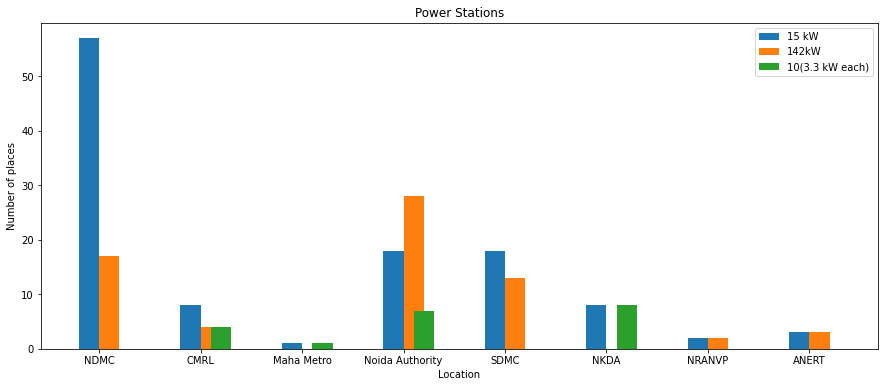

In [39]:
L1=[]
L2=[]
L3=[]
for place in Geographic_data['region'].unique():
    D = Geographic_data[Geographic_data['region']==place]
    l1=len(D['power'][D['power']=='15 kW'])
    l2 = len(D['power'][D['power']=='142kW'])
    l3 = len(D['power'][D['power']=='10(3.3 kW each)'])
    L1.append(l1)
    L2.append(l2)
    L3.append(l3)
    
X_axis = np.arange(len(Places))
plt.figure(figsize=(15,6))
plt.bar(X_axis - 0.1,L1, 0.2, label = '15 kW')
plt.bar(X_axis + 0.1,L2, 0.2, label = '142kW')
plt.bar(X_axis + 0.2,L3, 0.2, label = '10(3.3 kW each)')
plt.xticks(X_axis, Places)
plt.xlabel("Location")
plt.ylabel("Number of places")
plt.title("Power Stations")
plt.legend()
plt.show()

### K means

In [11]:
from sklearn.cluster import KMeans

In [41]:
Num_data['Brand'].max()

48

In [43]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(P.loc[:,['Segment','Seats']])   ### assume inital number of clusters
identified_clusters = kmeans.predict(P.iloc[:,3:5])

C:\Users\guthu\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\guthu\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Efficiency
- Range
Feature names seen at fit time, yet now missing:
- Seats
- Segment

  warnings.warn(message, FutureWarning)


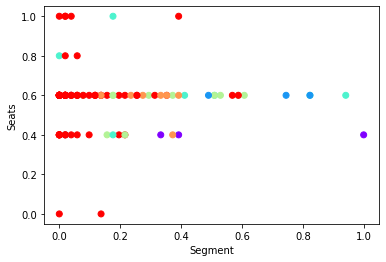

In [44]:
data_with_clusters = pd.DataFrame(np.array(P.loc[:,['Segment','Seats']]),columns=['Segment','Seats'])    ### plot the clusters 
data_with_clusters['Clusters'] = identified_clusters 
#plt.figure(figsize=(10,8))
plt.scatter(data_with_clusters['Segment'],data_with_clusters['Seats'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlabel('Segment')
plt.ylabel('Seats')
plt.show()

C:\Users\guthu\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\guthu\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\guthu\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\guthu\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmea

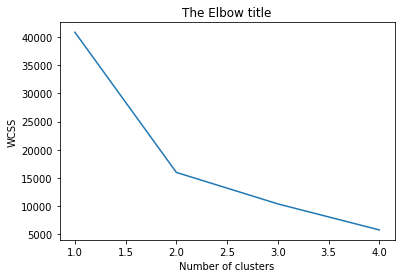

In [36]:
wcss=[]                       ### using elbow method to get optimal cluster nummber
for i in range(1,5):
 kmeans = KMeans(i)
 kmeans.fit(Num_data.iloc[:,3:5])
 wcss_iter = kmeans.inertia_
 wcss.append(wcss_iter)
 
number_clusters = range(1,5)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
Num_data.loc[:,['Range','PriceEuro']]

,Range,PriceEuro
0,3,55480
1,10,30000
2,1,56440
3,20,68040
4,11,32997
...,...,...
98,7,45000
99,1,96050
100,5,50000
101,6,65000
